<a href="https://colab.research.google.com/github/pradee1/Tensorflow_deeplearning.ai/blob/master/Exercise4_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('acc')>= DESIRED_ACCURACY:
      print("\nSTOP!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-06-21 18:42:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-06-21 18:42:09 (191 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
!ls /tmp/h-or-s/happy

happy1-00.png  happy1-08.png  happy1-16.png  happy2-04.png  happy2-12.png
happy1-01.png  happy1-09.png  happy1-17.png  happy2-05.png  happy2-13.png
happy1-02.png  happy1-10.png  happy1-18.png  happy2-06.png  happy2-14.png
happy1-03.png  happy1-11.png  happy1-19.png  happy2-07.png  happy2-15.png
happy1-04.png  happy1-12.png  happy2-00.png  happy2-08.png  happy2-16.png
happy1-05.png  happy1-13.png  happy2-01.png  happy2-09.png  happy2-17.png
happy1-06.png  happy1-14.png  happy2-02.png  happy2-10.png  happy2-18.png
happy1-07.png  happy1-15.png  happy2-03.png  happy2-11.png  happy2-19.png


In [0]:
# Directory with our training happy pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training sad pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

# Directory with our happy and sad pictures
train_dir = os.path.join('/tmp/h-or-s')

In [0]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])


['happy1-01.png', 'happy1-16.png', 'happy1-00.png', 'happy1-11.png', 'happy1-13.png', 'happy1-10.png', 'happy2-10.png', 'happy2-07.png', 'happy1-18.png', 'happy1-04.png']
['sad1-09.png', 'sad1-19.png', 'sad2-12.png', 'sad2-14.png', 'sad2-02.png', 'sad2-11.png', 'sad2-10.png', 'sad1-08.png', 'sad2-08.png', 'sad1-05.png']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

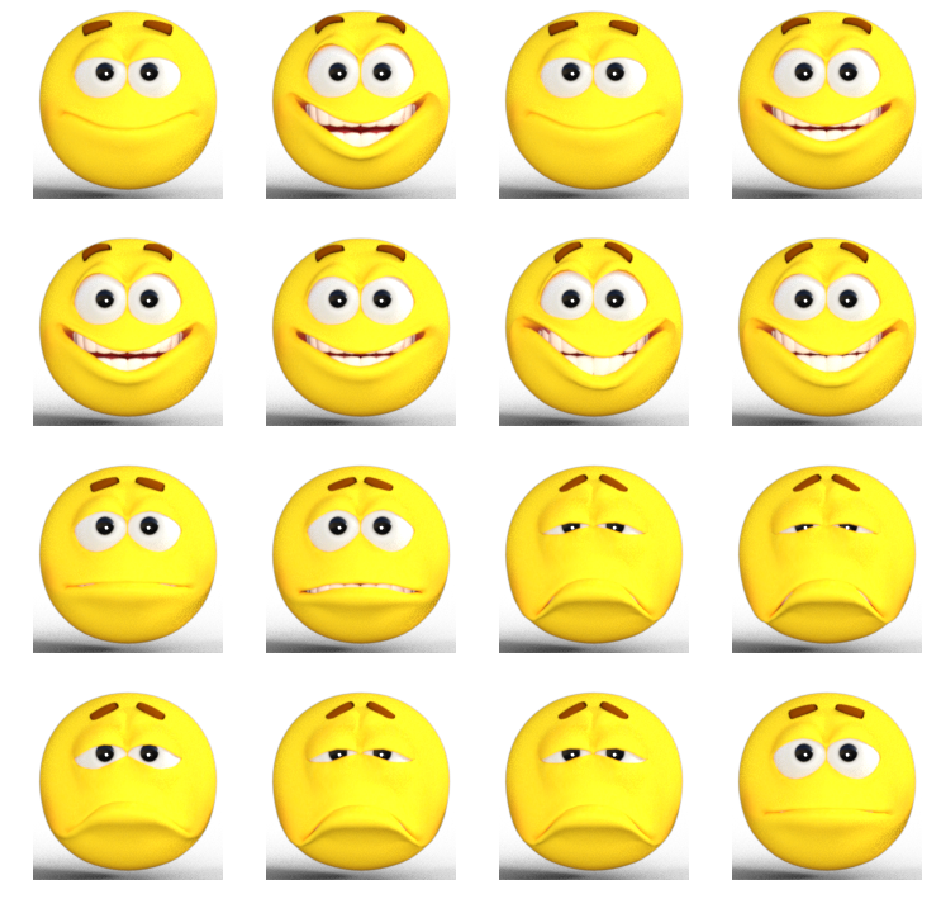

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), loss = 'binary_crossentropy',metrics=['accuracy'])

W0621 18:42:46.216556 139724467451776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 8,
                                                   class_mode = 'binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(train_generator, epochs =20, callbacks = [callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
10/10 [==============================] - 4s 434ms/step - loss: 1.5170 - acc: 0.5625
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 0.4672 - acc: 0.7625
Epoch 3/20
10/10 [==============================] - 0s 20ms/step - loss: 0.1552 - acc: 0.9625
Epoch 4/20
10/10 [==============================] - 0s 19ms/step - loss: 0.2422 - acc: 0.8750
Epoch 5/20
10/10 [==============================] - 0s 20ms/step - loss: 0.0804 - acc: 0.9750
Epoch 6/20
10/10 [==============================] - 0s 20ms/step - loss: 0.0912 - acc: 0.9625
Epoch 7/20
 9/10 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 1.0000
STOP!
10/10 [==============================] - 0s 19ms/step - loss: 0.0084 - acc: 1.0000
